In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df= pd.read_csv('heart.csv')
df.head()



,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [3]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

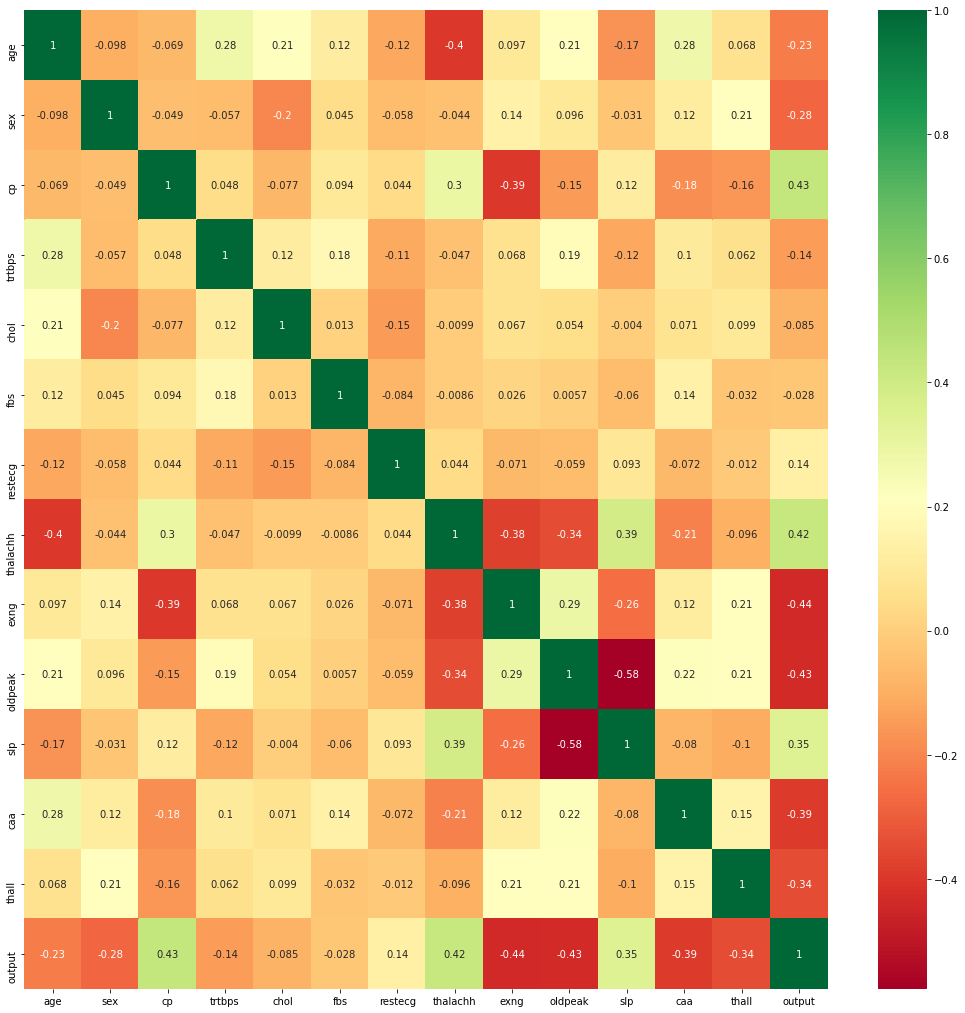

In [5]:
import seaborn as sns
plt.figure(figsize=(18,18))
hm=sns.heatmap(df.corr(),annot=True,cmap="RdYlGn")
plt.show()

In [6]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
print(X)

[[63.  1.  3. ...  0.  0.  1.]
 [37.  1.  2. ...  0.  0.  2.]
 [41.  0.  1. ...  2.  0.  2.]
 ...
 [68.  1.  0. ...  1.  2.  3.]
 [57.  1.  0. ...  1.  1.  3.]
 [57.  0.  1. ...  1.  1.  2.]]


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
X_train, X_test, y_train, y_test = train_test_split(
       X, y,test_size = 0.2, random_state=0)
reg = ExtraTreesRegressor(n_estimators=100, random_state=0).fit(
       X_train, y_train)


In [8]:
print(reg.feature_importances_)

[0.05958231 0.05479744 0.16166278 0.04981911 0.05467952 0.01726327
 0.03013182 0.07731962 0.09546682 0.06532476 0.05164581 0.14658074
 0.13572601]


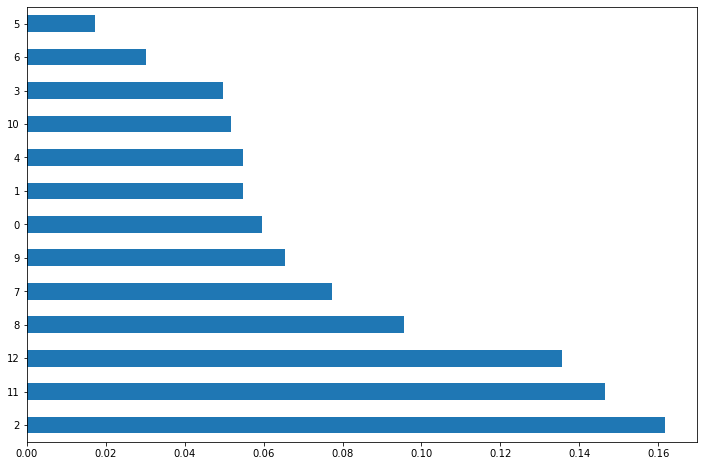

In [12]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(reg.feature_importances_)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()


In [14]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

[[0.1 0. ]
 [0.5 1. ]
 [0.5 0. ]
 [0.  0. ]
 [0.2 1. ]
 [0.7 0. ]
 [0.2 0. ]
 [0.  0. ]
 [0.  0. ]
 [0.1 0. ]
 [0.6 1. ]
 [1.  1. ]
 [0.  0. ]
 [1.  1. ]
 [1.  1. ]
 [0.5 1. ]
 [0.2 1. ]
 [1.  1. ]
 [0.1 0. ]
 [0.6 1. ]
 [0.9 1. ]
 [0.3 0. ]
 [0.  0. ]
 [0.1 0. ]
 [0.8 1. ]
 [0.5 0. ]
 [0.  0. ]
 [0.2 0. ]
 [0.9 1. ]
 [0.9 1. ]
 [0.4 0. ]
 [0.2 0. ]
 [1.  1. ]
 [0.9 1. ]
 [1.  1. ]
 [0.5 0. ]
 [0.  0. ]
 [1.  1. ]
 [0.  0. ]
 [0.  0. ]
 [0.8 1. ]
 [0.4 1. ]
 [1.  1. ]
 [0.  0. ]
 [0.5 1. ]
 [0.8 1. ]
 [0.7 1. ]
 [0.7 0. ]
 [0.1 0. ]
 [0.9 1. ]
 [0.9 1. ]
 [0.5 1. ]
 [1.  1. ]
 [0.6 1. ]
 [1.  1. ]
 [0.  0. ]
 [1.  1. ]
 [0.5 0. ]
 [0.9 1. ]
 [1.  1. ]
 [0.6 1. ]]


0.6039651416122004

In [15]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

[[0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 1.]
 [0. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [1. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 1.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [0. 1.]
 [1. 1.]
 [1. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]


0.13616557734204804

In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_poly, y_train)
y_pred = regressor.predict(poly_reg.transform(X_test))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

[[-5.27e-01  0.00e+00]
 [-5.21e-01  1.00e+00]
 [-9.23e-01  0.00e+00]
 [ 3.25e-01  0.00e+00]
 [ 2.54e-01  1.00e+00]
 [ 2.32e+00  0.00e+00]
 [ 3.99e-02  0.00e+00]
 [ 1.96e-01  0.00e+00]
 [ 2.25e+01  0.00e+00]
 [-2.99e-02  0.00e+00]
 [-7.41e+00  1.00e+00]
 [ 5.25e-01  1.00e+00]
 [-4.01e-01  0.00e+00]
 [ 8.64e-01  1.00e+00]
 [ 9.42e-01  1.00e+00]
 [-6.00e-01  1.00e+00]
 [ 5.82e-02  1.00e+00]
 [ 7.05e-01  1.00e+00]
 [ 1.49e+00  0.00e+00]
 [ 9.02e-01  1.00e+00]
 [ 6.14e-01  1.00e+00]
 [ 5.77e-01  0.00e+00]
 [-1.10e+00  0.00e+00]
 [ 1.80e-01  0.00e+00]
 [ 7.75e-01  1.00e+00]
 [ 1.64e+00  0.00e+00]
 [ 1.12e-01  0.00e+00]
 [ 1.03e+00  0.00e+00]
 [ 3.34e-01  1.00e+00]
 [-3.91e-03  1.00e+00]
 [ 1.13e+00  0.00e+00]
 [-4.54e-01  0.00e+00]
 [ 1.30e+00  1.00e+00]
 [ 9.87e-01  1.00e+00]
 [ 8.38e-01  1.00e+00]
 [ 1.84e+00  0.00e+00]
 [ 3.76e+00  0.00e+00]
 [ 4.85e-01  1.00e+00]
 [ 1.27e+00  0.00e+00]
 [ 1.48e+00  0.00e+00]
 [ 5.58e-01  1.00e+00]
 [ 6.17e-02  1.00e+00]
 [ 2.43e+00  1.00e+00]
 [ 5.04e-01

-49.387746844520144

In [20]:
y = y.reshape(len(y),1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(X_test)))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

[[ 0.11  0.  ]
 [ 0.49  1.  ]
 [ 0.52  0.  ]
 [-0.02  0.  ]
 [ 0.1   1.  ]
 [ 0.55  0.  ]
 [ 0.14  0.  ]
 [ 0.08  0.  ]
 [ 0.16  0.  ]
 [ 0.02  0.  ]
 [ 0.7   1.  ]
 [ 1.05  1.  ]
 [-0.02  0.  ]
 [ 1.05  1.  ]
 [ 1.01  1.  ]
 [ 0.74  1.  ]
 [ 0.19  1.  ]
 [ 0.8   1.  ]
 [ 0.05  0.  ]
 [ 0.78  1.  ]
 [ 0.99  1.  ]
 [ 0.34  0.  ]
 [ 0.18  0.  ]
 [ 0.18  0.  ]
 [ 0.94  1.  ]
 [ 0.65  0.  ]
 [ 0.15  0.  ]
 [ 0.43  0.  ]
 [ 0.97  1.  ]
 [ 0.73  1.  ]
 [ 0.69  0.  ]
 [ 0.12  0.  ]
 [ 1.01  1.  ]
 [ 0.71  1.  ]
 [ 1.    1.  ]
 [ 0.38  0.  ]
 [ 0.14  0.  ]
 [ 0.96  1.  ]
 [ 0.06  0.  ]
 [ 0.24  0.  ]
 [ 0.81  1.  ]
 [ 0.78  1.  ]
 [ 0.7   1.  ]
 [ 0.2   0.  ]
 [ 0.64  1.  ]
 [ 0.61  1.  ]
 [ 0.94  1.  ]
 [ 0.5   0.  ]
 [ 0.23  0.  ]
 [ 0.8   1.  ]
 [ 0.96  1.  ]
 [ 0.56  1.  ]
 [ 1.05  1.  ]
 [ 0.74  1.  ]
 [ 0.91  1.  ]
 [ 0.09  0.  ]
 [ 0.96  1.  ]
 [ 0.86  0.  ]
 [ 0.91  1.  ]
 [ 1.12  1.  ]
 [ 0.93  1.  ]]


C:\Users\ramuu\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.5884042104720533

In [25]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 45.02 %
Standard Deviation: 13.60 %


C:\Users\ramuu\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\ramuu\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\ramuu\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\ramuu\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

In [27]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = regressor,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

ValueError: continuous is not supported